In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# датасет https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset
dataset = pd.read_csv('Spotify.csv')

Датасет содержит аудио статистику топ-2000 треков на Spotify. Данные содержат 15 столбцов, каждый из которых описывает трек и его качества (громкость, продолжительность, популярность и тд). Представлены композиции, выпущенные с 1956 по 2019 год. Многие из них от известных исполнителей - Queen , The Beatles , Guns N'Roses и тд.

In [3]:
dataset.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
dataset.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

В датасете нет пропусков, все поля заполнены

In [5]:
dataset = pd.DataFrame(dataset)

Сменим названия некоторых столбцов, во избежание проблем с дальнейшими действиями с датасетом

In [6]:
list(dataset)

['Index',
 'Title',
 'Artist',
 'Top Genre',
 'Year',
 'Beats Per Minute (BPM)',
 'Energy',
 'Danceability',
 'Loudness (dB)',
 'Liveness',
 'Valence',
 'Length (Duration)',
 'Acousticness',
 'Speechiness',
 'Popularity']

In [7]:
dataset = pd.DataFrame(dataset).rename(columns={'Loudness (dB)': 'Loudness', 'Beats Per Minute (BPM)': 'BeatsPerMinute', 'Length (Duration)': 'Length', 'Top Genre': 'Genre'})
list(pd.DataFrame(dataset))

['Index',
 'Title',
 'Artist',
 'Genre',
 'Year',
 'BeatsPerMinute',
 'Energy',
 'Danceability',
 'Loudness',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity']

### Описатальная статистика + гипотезы

Text(0.5, 1.0, 'Comparing music genres')

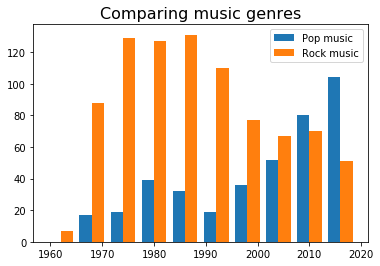

In [8]:
rock = dataset[dataset['Genre'].str.contains(r'rock')]
pop = dataset[dataset['Genre'].str.contains(r'pop')]
plt.hist([pop['Year'], rock['Year']], label = ['Pop music', 'Rock music'])
plt.legend()
plt.title('Comparing music genres', fontsize=16)

* Пик популярности музыки в стиле рок приходился на 1970-90 годы и после имеет тенденцию спада
* Начиная с 70-х годов рок стала вытеснять поп музыка
<hr>
<p> Такие изменения произошли из-за смены моды и появления новых исполнителей

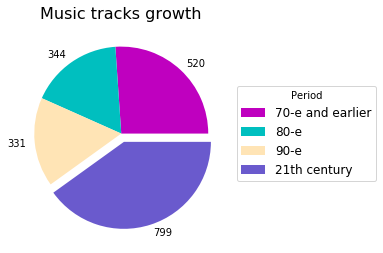

In [9]:
df = pd.DataFrame(dataset)
a = df.loc[df['Year'] < 1980]
b = df.loc[(df['Year'] < 1990) & (df['Year'] > 1979)]
c = df.loc[(df['Year'] < 2000) & (df['Year'] > 1989)]
d = df.loc[df['Year'] > 1999]
labels = [a.Year.count(), b.Year.count(), c.Year.count(), d.Year.count()]
sizes = [a.Year.count(), b.Year.count(), c.Year.count(), d.Year.count()]
explode = (0, 0, 0, 0.1)
plt.pie(sizes, labels = labels, explode = explode, colors=['m','c','moccasin', 'slateblue'])
plt.title('Music tracks growth', fontsize=16)
plt.legend(['70-e and earlier', '80-e', '90-e', '21th century'], title="Period", loc="right", bbox_to_anchor=(1, 0, 0.7, 1), fontsize=12)

* С появлением новых музыкальных направлений и развития сферы музыки и развлечений в общем стало больше треков, которые пользовались популярностью. В датасет включены только топ 2000 треков на spotify, из них более четверти приходится на 70-е годы и ранее
* В периоды 80-х, 90-х годов количество треков, вошедших в историю, снизилось. На это появлияли во многом кризисы и войны - конец "Холодной войны", Вторая мировая война, "железный занавес" в СССР и тд
* Начиная с 21 века стали стремительно развиваться новые технологии, появились новые способы записи треков и их распространения, поэтому на данных период приходится более всего треков

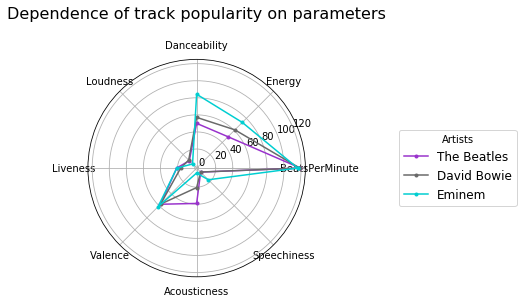

Text(0.5, 1.0, 'Popularity of artists')

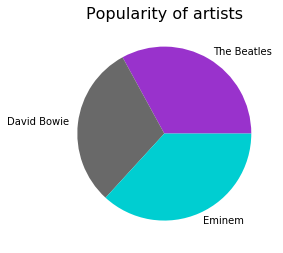

In [12]:
#Music parameners of artists
beatles = dataset[dataset['Artist'] == 'The Beatles']
beatles_param = list(abs(beatles.mean()[2:11]))
beatles_param.remove(beatles_param[6])
beatles_param = np.concatenate((beatles_param, [beatles_param[0]]))

db = dataset[dataset['Artist'] == 'David Bowie']
db_param = list(abs(db.mean()[2:11]))
db_param.remove(db_param[6])
db_param = np.concatenate((db_param, [db_param[0]]))

eminem = dataset[dataset['Artist'] == 'Eminem']
eminem_param = list(abs(eminem.mean()[2:11]))
eminem_param.remove(eminem_param[6])
eminem_param = np.concatenate((eminem_param, [eminem_param[0]]))

labels = ['BeatsPerMinute', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Acousticness', 'Speechiness']
fig = plt.figure()
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
ax = fig.add_subplot(111, polar = True)
ax.plot(angles, beatles_param, '.-', linewidth=1.5, color='darkorchid')
ax.plot(angles, db_param, '.-', linewidth=1.5, color='dimgray')
ax.plot(angles, eminem_param, '.-', linewidth=1.5, color='darkturquoise')
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.title('Dependence of track popularity on parameters', fontsize=16, pad=30)
plt.legend(['The Beatles', 'David Bowie', 'Eminem'], title="Artists", loc="right", bbox_to_anchor=(1, 0, 1, 1), fontsize=12)
plt.show()

#Popularity of artists
fig, ax = plt.subplots()
ax.pie([beatles['Popularity'].mean(), db['Popularity'].mean(), eminem['Popularity'].mean()], labels = ['The Beatles', 'David Bowie', 'Eminem'], colors=['darkorchid','dimgray','darkturquoise'])
plt.title('Popularity of artists', fontsize=16)

<p> По полученным графикам проследим зависимость популярности разножанровых артистов/групп от усредненных характеристик треков </p>

* треки Eminem'а в жанре рэп более популярны, чем David'а, и обаладют намного большей энергичностью и танцевальностью 
* группа The Beatles и Eminem одинаково популярны, однако их музыка сильно отличается по акустическому параметру
* треки The Beatles и David Bowie практически идентичны по параметрам, за исключением акустики, но их популярность отличается

<p> Таким образом, можно проследить графическую зависимость популярности артиста от музыкальных параметров его треков. Однако не стоит полагаться только на эти данные, так как они не учитывают личное отношение слушателей к исполнителям</p>